In [1]:
import time
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as snsgboost
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,4

/home/ozkan/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
train = pd.read_csv('train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144788 entries, 0 to 144787
Columns: 139 entries, SellerCode to Payment1st3Months_F
dtypes: float64(36), int64(103)
memory usage: 153.5 MB


In [3]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131877 entries, 0 to 131876
Columns: 143 entries, SellerCode to Payment1st3Months_F
dtypes: float64(36), int64(107)
memory usage: 143.9 MB


In [4]:
dtype_df_train = train.dtypes.reset_index()
dtype_df_train.columns = ["Count", "Column Type"]
dtype_df_train

,Count,Column Type
0,SellerCode,int64
1,FollowingFlag,int64
2,citycode,float64
3,GenderCode,float64
4,CustomerAge,float64
5,CustomerAgeGroup,int64
6,LoanCountasGuarantor,int64
7,LoanCountasGuarantorGroup,int64
8,DistinctGuarantorCount,int64
9,ProtocolCount,int64


In [5]:
dtype_df_test = test.dtypes.reset_index()
dtype_df_test.columns = ["Count", "Column Type"]
dtype_df_test

,Count,Column Type
0,SellerCode,int64
1,FollowingFlag,int64
2,citycode,float64
3,GenderCode,float64
4,CustomerAge,float64
5,CustomerAgeGroup,int64
6,LoanCountasGuarantor,int64
7,LoanCountasGuarantorGroup,int64
8,DistinctGuarantorCount,int64
9,ProtocolCount,int64


In [6]:
dtype_df_train.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,103
1,float64,36


In [7]:
dtype_df_test.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,107
1,float64,36


In [8]:
for name in test.columns:
    if name not in train.columns:
        print(name)

Inbound_Count_-12+Month
Inbound_Duration_-12+Month
Inbound_Count_Ever
Inbound_Duration_Ever


In [9]:
test = test.drop(['Inbound_Count_-12+Month', 'Inbound_Duration_-12+Month',
                  'Inbound_Count_Ever','Inbound_Duration_Ever'], axis=1)

In [10]:
dtype_df_test = test.dtypes.reset_index()
dtype_df_test.columns = ["Count", "Column Type"]
dtype_df_test
dtype_df_test.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Count
0,int64,103
1,float64,36


In [11]:
missing_df_train = train.isnull().sum(axis=0).reset_index()
missing_df_train.columns = ['column_name', 'missing_count']
missing_df_train['missing_ratio'] = missing_df_train['missing_count'] / train.shape[0]
missing_df_train.loc[missing_df_train['missing_count']>0]

,column_name,missing_count,missing_ratio
2,citycode,1963,0.013558
3,GenderCode,2,0.000014
4,CustomerAge,1,0.000007


In [12]:
medianCityCode = train['citycode'].median(axis=0)
train['citycode'].fillna(medianCityCode, inplace=True)
medianGenderCode = train['GenderCode'].median(axis=0)
train['GenderCode'].fillna(medianGenderCode, inplace=True)
medianCustomerAge = train['CustomerAge'].median(axis=0)
train['CustomerAge'].fillna(medianCustomerAge, inplace=True)

In [13]:
missing_df_train = train.isnull().sum(axis=0).reset_index()
missing_df_train.columns = ['column_name', 'missing_count']
missing_df_train['missing_ratio'] = missing_df_train['missing_count'] / train.shape[0]
missing_df_train.loc[missing_df_train['missing_count']>0]

,column_name,missing_count,missing_ratio


In [14]:
missing_df_test = test.isnull().sum(axis=0).reset_index()
missing_df_test.columns = ['column_name', 'missing_count']
missing_df_test['missing_ratio'] = missing_df_test['missing_count'] / test.shape[0]
missing_df_test.loc[missing_df_test['missing_count']>0]

,column_name,missing_count,missing_ratio
2,citycode,1851,0.014036
3,GenderCode,174,0.001319
4,CustomerAge,3,0.000023


In [15]:
medianCityCode = test['citycode'].median(axis=0)
test['citycode'].fillna(medianCityCode, inplace=True)
medianGenderCode = test['GenderCode'].median(axis=0)
test['GenderCode'].fillna(medianGenderCode, inplace=True)
medianCustomerAge = test['CustomerAge'].median(axis=0)
test['CustomerAge'].fillna(medianCustomerAge, inplace=True)

In [16]:
missing_df_test = test.isnull().sum(axis=0).reset_index()
missing_df_test.columns = ['column_name', 'missing_count']
missing_df_test['missing_ratio'] = missing_df_test['missing_count'] / test.shape[0]
missing_df_test.loc[missing_df_test['missing_count']>0]

,column_name,missing_count,missing_ratio


In [17]:
y_train = train['Payment1st3Months_F']
x_train = train.drop(['Payment1st3Months_F'], axis=1)

In [18]:
y_test = test['Payment1st3Months_F']
x_test = test.drop(['Payment1st3Months_F'], axis=1)

In [19]:
def modelfit(alg, y_train, x_train, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm
    alg.fit(x_train, y_train)
    #Predict training set
    dtrain_predictions = alg.predict(x_train)
    dtrain_predprob = alg.predict_proba(x_train)[:,1]
    #Perform Cross-Validation
    if performCV:
        cv_score = cross_val_score(alg, x_train, y_train, cv=cv_folds, scoring='roc_auc', n_jobs=3)
    #Print Model Report
    print "\nModel Report"
    print "Accuracy: %.4g" %accuracy_score(y_train.values, dtrain_predictions)
    print "AUC Score (Train): %f" %roc_auc_score(y_train, dtrain_predprob)
    if performCV:
        print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" \
        % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, x_train.columns).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')

In [20]:
lg0 = LogisticRegression()
modelfit(lg0, y_train, x_train, printFeatureImportance=False)


Model Report
Accuracy: 0.9519
AUC Score (Train): 0.603033
CV Score : Mean - 0.6057087 | Std - 0.03304796 | Min - 0.5621222 | Max - 0.6616525


In [21]:
y_pred_lg0 = lg0.predict(x_test)
y_pred_proba_lg0 = lg0.predict_proba(x_test)[:,1]
print('Accuracy for Logistic Regression:')
print(accuracy_score(y_test, y_pred_lg0))
print('Confusion Matrix for Logistic Regression')
print(confusion_matrix(y_test, y_pred_lg0))
print('F1 Score for Logistic Regression')
print(f1_score(y_test, y_pred_lg0))
print('AUC Score for Logistic Regression')
print(roc_auc_score(y_test, y_pred_proba_lg0))

Accuracy for Logistic Regression:
0.977312192422
Confusion Matrix for Logistic Regression
[[128874     91]
 [  2901     11]]
F1 Score for Logistic Regression
0.00729927007299
AUC Score for Logistic Regression
0.59426355349



Model Report
Accuracy: 1
AUC Score (Train): 1.000000
CV Score : Mean - 0.5383926 | Std - 0.005063399 | Min - 0.5303481 | Max - 0.5440134


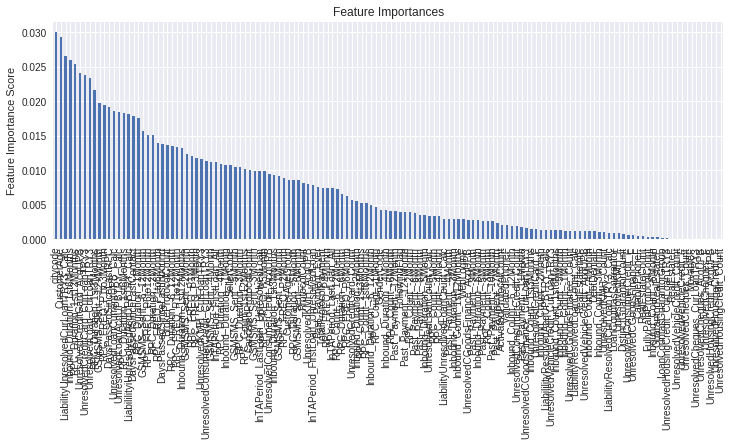

In [22]:
dt0 = DecisionTreeClassifier()
modelfit(dt0, y_train, x_train)

In [23]:
y_pred_dt0 = dt0.predict(x_test)
y_pred_proba_dt0 = dt0.predict_proba(x_test)[:,1]
print('Accuracy for Decision Tree Classifier:')
print(accuracy_score(y_test, y_pred_dt0))
print('Confusion Matrix for Decision Tree Classifier')
print(confusion_matrix(y_test, y_pred_dt0))
print('F1 Score for Decision Tree Classifier')
print(f1_score(y_test, y_pred_dt0))
print('AUC Score for Decision Tree Classifier')
print(roc_auc_score(y_test, y_pred_proba_dt0))

Accuracy for Decision Tree Classifier:
0.913199420672
Confusion Matrix for Decision Tree Classifier
[[120005   8960]
 [  2487    425]]
F1 Score for Decision Tree Classifier
0.0691225502155
AUC Score for Decision Tree Classifier
0.538235793861



Model Report
Accuracy: 0.9905
AUC Score (Train): 0.999825
CV Score : Mean - 0.6553875 | Std - 0.006265888 | Min - 0.6494629 | Max - 0.6673647


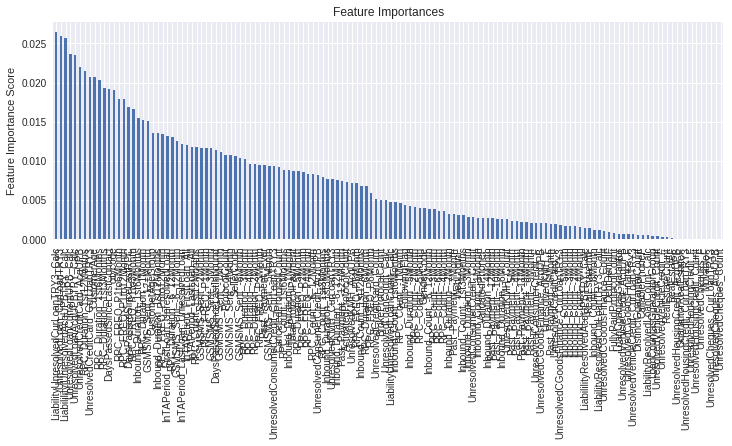

In [24]:
rf0 = RandomForestClassifier()
modelfit(rf0, y_train, x_train)

In [25]:
y_pred_rf0 = rf0.predict(x_test)
y_pred_proba_rf0 = rf0.predict_proba(x_test)[:,1]
print('Accuracy for Random Forest Classifier:')
print(accuracy_score(y_test, y_pred_rf0))
print('Confusion Matrix for Random Forest Classifier')
print(confusion_matrix(y_test, y_pred_rf0))
print('F1 Score for Random Forest Classifier')
print(f1_score(y_test, y_pred_rf0))
print('AUC Score for Random Forest Classifier')
print(roc_auc_score(y_test, y_pred_proba_rf0))

Accuracy for Random Forest Classifier:
0.976432584909
Confusion Matrix for Random Forest Classifier
[[128730    235]
 [  2873     39]]
F1 Score for Random Forest Classifier
0.0244821092279
AUC Score for Random Forest Classifier
0.663088220758



Model Report
Accuracy: 0.953
AUC Score (Train): 0.786724
CV Score : Mean - 0.7735187 | Std - 0.006373076 | Min - 0.7611875 | Max - 0.7792508


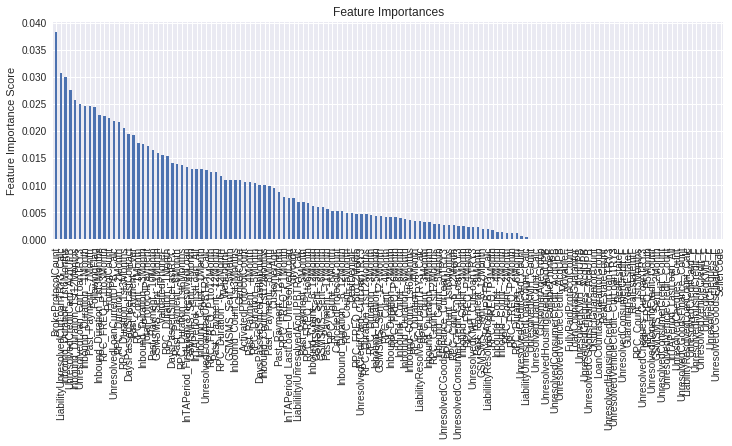

In [26]:
gbm0 = GradientBoostingClassifier()
modelfit(gbm0, y_train, x_train)

In [27]:
y_pred_gbm0 = gbm0.predict(x_test)
y_pred_proba_gbm0 = gbm0.predict_proba(x_test)[:,1]
print('Accuracy for Gradient Boosting Classifier:')
print(accuracy_score(y_test, y_pred_gbm0))
print('Confusion Matrix for Gradient Boosting Classifier')
print(confusion_matrix(y_test, y_pred_gbm0))
print('F1 Score for Gradient Boosting Classifier')
print(f1_score(y_test, y_pred_rf0))
print('AUC Score for Gradient Boosting Classifier')
print(roc_auc_score(y_test, y_pred_proba_gbm0))

Accuracy for Gradient Boosting Classifier:
0.977008879486
Confusion Matrix for Gradient Boosting Classifier
[[128798    167]
 [  2865     47]]
F1 Score for Gradient Boosting Classifier
0.0244821092279
AUC Score for Gradient Boosting Classifier
0.783455554908



Model Report
Accuracy: 0.9522
AUC Score (Train): 0.776141
CV Score : Mean - 0.7668825 | Std - 0.007364291 | Min - 0.7529471 | Max - 0.7733671


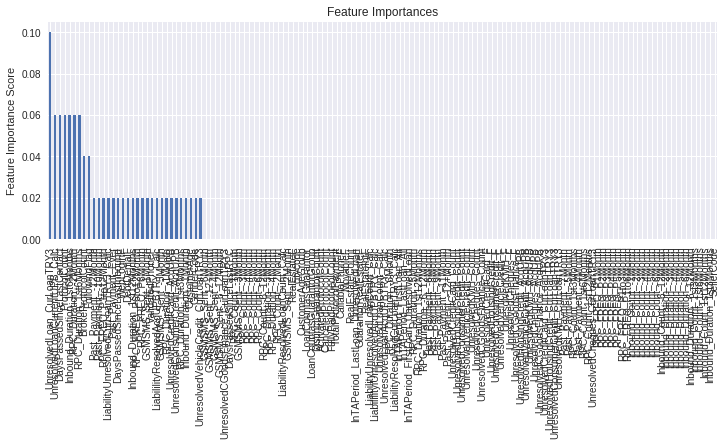

In [28]:
abm0 = AdaBoostClassifier()
modelfit(abm0, y_train, x_train)

In [29]:
y_pred_abm0 = abm0.predict(x_test)
y_pred_proba_abm0 = abm0.predict_proba(x_test)[:,1]
print('Accuracy for Adaboost Classifier:')
print(accuracy_score(y_test, y_pred_abm0))
print('Confusion Matrix for Adaboost Classifier')
print(confusion_matrix(y_test, y_pred_abm0))
print('F1 Score for Adaboost Classifier')
print(f1_score(y_test, y_pred_abm0))
print('AUC Score for Adaboost Classifier')
print(roc_auc_score(y_test, y_pred_proba_abm0))

Accuracy for Adaboost Classifier:
0.97708470772
Confusion Matrix for Adaboost Classifier
[[128816    149]
 [  2873     39]]
F1 Score for Adaboost Classifier
0.0251612903226
AUC Score for Adaboost Classifier
0.773966112228



Model Report
Accuracy: 0.9525
AUC Score (Train): 0.788648
CV Score : Mean - 0.7746098 | Std - 0.006738115 | Min - 0.7619917 | Max - 0.7815241


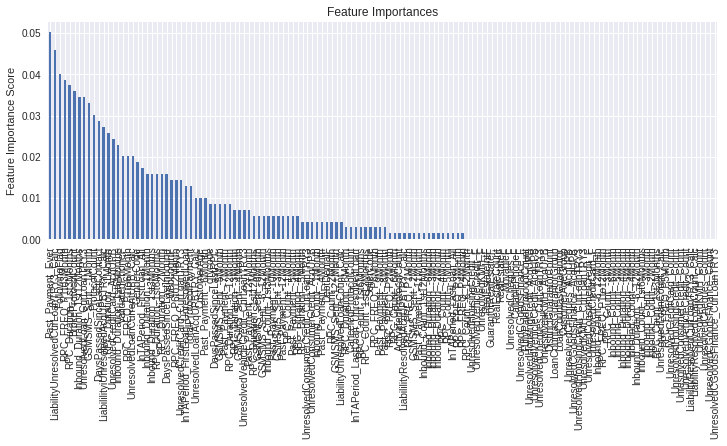

In [30]:
xgb0 = XGBClassifier()
modelfit(xgb0, y_train, x_train)

In [31]:
y_pred_xgb0 = xgb0.predict(x_test)
y_pred_proba_xgb0 = xgb0.predict_proba(x_test)[:,1]
print('Accuracy for XGBoost:')
print(accuracy_score(y_test, y_pred_xgb0))
print('Confusion Matrix for XGBoost')
print(confusion_matrix(y_test, y_pred_xgb0))
print('F1 Score for XGBoost')
print(f1_score(y_test, y_pred_xgb0))
print('AUC Score for XGBoost')
print(roc_auc_score(y_test, y_pred_proba_xgb0))

Accuracy for XGBoost:
0.977767161825
Confusion Matrix for XGBoost
[[128926     39]
 [  2893     19]]
F1 Score for XGBoost
0.0127946127946
AUC Score for XGBoost
0.783198835413
